<a href="https://colab.research.google.com/github/exterm/uvm-pocs/blob/main/pocs5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

In [ ]:
assignment='05'

## Imports

In [ ]:
# plotting
import matplotlib.pyplot as plt

# Data wrangling
import pandas as pd # library for data analysis
import numpy as np
import scipy.stats as st

## Initialize Filesystem

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

# create directory for this assignment
try: 
    os.mkdir(f'/content/drive/MyDrive/pocs/{assignment}/') 
except OSError as error: 
    print(error)

Mounted at /content/drive
[Errno 17] File exists: '/content/drive/MyDrive/pocs/05/'


#1
Plot time series for the rank of these baby names in the US over all years in the
census data:

- Shirley.
- Ronald.
- Madison.
- Aiden.
- A name of your choice.

Note that if you plotted relative frequency rather than rank, you would need to
know (or estimate) the overall number of babies born. Ranks are both easy simple
to work with and easy to understand.

In [ ]:
def fetch_csv(prefix, year):
  data = pd.read_csv(f'/content/drive/MyDrive/pocs/data/names-{prefix}{year}.txt', header=None, names=['Name', 'Gender', 'k'], index_col='Name')
  data.pop('Gender')
  return data

def load_and_transform_year_data(year):
  girls_data = fetch_csv('girls', year)
  boys_data = fetch_csv('boys', year)
  merged_data = girls_data.add(boys_data, fill_value=0)
  ranks = st.rankdata(-merged_data['k'])
  merged_data['Rank'] = ranks
  return merged_data

def load_data():
  return [[year, load_and_transform_year_data(year)] for year in range(1880, 2018)]

ranked_data = load_data()

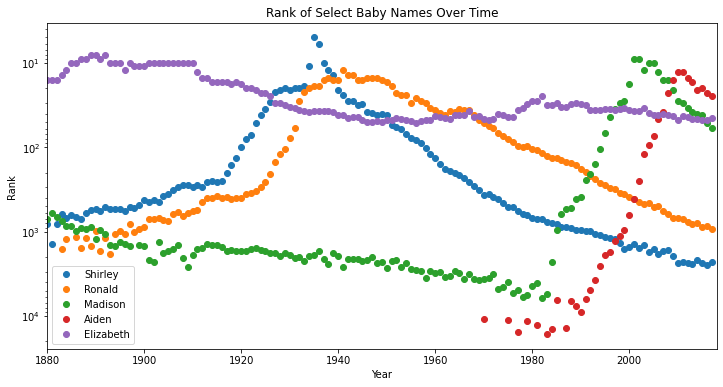

In [ ]:
from functools import reduce

def time_series(name):
  df = pd.DataFrame([[year, year_data['Rank'].get(name, np.nan)] for year, year_data in ranked_data], columns=['Year', 'Rank'])
  return df.set_index('Year')

def draw_time_series(names):
  plt.figure(figsize=(12, 6))
  for name in names:
    series = time_series(name)
    plt.plot(series, 'o', label=name)

  plt.ylabel('Rank')
  plt.xlabel('Year')
  plt.title("Rank of Select Baby Names Over Time")
  plt.semilogy(10)
  plt.xlim(1880,2018)
  ax = plt.gca()
  ax.invert_yaxis()
  plt.legend()
  plt.savefig(f'/content/drive/MyDrive/pocs/{assignment}/01-rank-time-series.png', dpi=600)
  plt.show()

draw_time_series(['Shirley', 'Ronald', 'Madison', 'Aiden', 'Elizabeth'])
